In [1]:
import sys
sys.path.append("../py/")

import numpy as np
import subprocess
import importlib
import mlflow as ml

import _conditions1 as cn
import _functions1 as fn
import _sim_iter1 as si

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
importlib.reload(si)
importlib.reload(cn)
importlib.reload(fn)

<module '_functions1' from '/home/twj8/projects/bart_survival_paper/notebook/../py/_functions1.py'>

In [3]:
exp_name = "test1"

if ml.get_experiment_by_name(exp_name) == None:
    exp_id = ml.create_experiment(exp_name)
else:
    exp_id = ml.set_experiment(exp_name)

# Scenario 1

this might be a vscode issue. Try creating a py script and running from command line

In [4]:
exp_id

<Experiment: artifact_location='file:///home/twj8/projects/bart_survival_paper/notebook/mlruns/584866594852049595', creation_time=1709754375410, experiment_id='584866594852049595', last_update_time=1709754375410, lifecycle_stage='active', name='test1', tags={}>

In [5]:
iters = 2

# Cond 1
SPLIT_RULES1 =  [
    "pmb.ContinuousSplitRule()", 
]
model_dict1 = {"trees": 20,
    "split_rules": SPLIT_RULES1
}
sampler_dict1 = {
            "draws": 100,
            "tune": 25,
            "cores": 7,
            "chains": 7,
            "compute_convergence_checks": False
        }

# Cond 2
SPLIT_RULES2 =  [
    "pmb.ContinuousSplitRule()", 
    "pmb.OneHotSplitRule()"
]
model_dict2 = {"trees": 20,
    "split_rules": SPLIT_RULES2
}
sampler_dict2 = {
            "draws": 100,
            "tune": 25,
            "cores": 7,
            "chains": 7,
            "compute_convergence_checks": False
        }

In [6]:
def log_params(name, n, scenario, model_dict, sampler_dict):
    n_dict = {"N":n}
    oname = f"{name}_{n}_n.json"
    ml.log_dict(n_dict, oname)
    oname = f"{name}_{n}_scenario.json"
    ml.log_dict(scenario, oname)
    oname = f"{name}_{n}_model_dict.json"
    ml.log_dict(model_dict, oname)
    oname = f"{name}_{n}_sampler_dict.json"
    ml.log_dict(sampler_dict, oname)


def log_mets(name, n, cens, k, p, r):
    cens = {"cens_retrieved":cens}
    oname = f"{name}_{n}_cens.json"
    ml.log_dict(cens, oname)
    k = dict([(i,k[i].tolist()) for i in k.keys()])
    oname = f"{name}_{n}_met_k.json"
    ml.log_dict(k, oname)
    p = dict([(i,p[i].tolist()) for i in p.keys()])
    oname = f"{name}_{n}_met_p.json"
    ml.log_dict(p, oname)
    r = dict([(i,r[i].tolist()) for i in r.keys()])
    oname = f"{name}_{n}_met_r.json"
    ml.log_dict(r, oname)


def log_figures(name, n, fig):
    oname = f"{name}_{n}.png"
    ml.log_figure(fig, oname)

mean shape 0.7999999999999998
mean scale 2.5
mean time draws 2.1245408041070735
cens mean 8.96
(217, 1)


Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 10 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 217, 1, 9
y1,yn: 1.000000, 1.000000
x1,x[n*p]: 1.000000, 1.000000
xp1,xp[np*p]: 1.000000, 16.000000
*****Number of Trees: 50
*****Number of Cut Points: 8 ... 8
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.250962
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,1,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 1s
trcnt,tecnt: 167,167
List of 24
 $ yhat.train     : num [1

Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 7 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 250, 1, 10
y1,yn: 1.000000, 1.000000
x1,x[n*p]: 1.000000, 2.000000
xp1,xp[np*p]: 1.000000, 11.000000
*****Number of Trees: 50
*****Number of Cut Points: 9 ... 9
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.434397
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,1,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 1s
trcnt,tecnt: 167,167
List of 24
 $ yhat.train     : num [

Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 8 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 132, 1, 4
y1,yn: 1.000000, 1.000000
x1,x[n*p]: 1.000000, 1.000000
xp1,xp[np*p]: 1.000000, 4.000000
*****Number of Trees: 50
*****Number of Cut Points: 3 ... 3
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.191052
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,1,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 0s
trcnt,tecnt: 167,167
List of 24
 $ yhat.train     : num [1:

Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 7 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 135, 1, 3
y1,yn: 1.000000, 1.000000
x1,x[n*p]: 1.000000, 2.000000
xp1,xp[np*p]: 1.000000, 3.000000
*****Number of Trees: 50
*****Number of Cut Points: 2 ... 2
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.311322
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,1,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 1s
trcnt,tecnt: 167,167
List of 24
 $ yhat.train     : num [1:

Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 7 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 254, 2, 20
y1,yn: 1.000000, 1.000000
x1,x[n*p]: 1.000000, 0.000000
xp1,xp[np*p]: 1.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 9 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.405596
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 1s
trcnt,tecnt: 167,167
mean shape 1.07
mean scale 3.06699999

Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 8 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 282, 2, 22
y1,yn: 1.000000, 1.000000
x1,x[n*p]: 1.000000, 0.000000
xp1,xp[np*p]: 1.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 10 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.561483
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 1s
trcnt,tecnt: 167,167
mean shape 1.07
mean scale 3.0669999

Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 7 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 172, 2, 12
y1,yn: 1.000000, 1.000000
x1,x[n*p]: 1.000000, 0.000000
xp1,xp[np*p]: 1.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 5 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.468349
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 1s
trcnt,tecnt: 167,167
mean shape 1.07
mean scale 3.06699999

Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 8 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 175, 2, 10
y1,yn: 1.000000, 1.000000
x1,x[n*p]: 1.000000, 0.000000
xp1,xp[np*p]: 1.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 4 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.549216
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 1s
trcnt,tecnt: 167,167
mean shape 0.8
mean scale 2.5
mean ti

Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 8 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 508, 1, 13
y1,yn: 1.000000, 1.000000
x1,x[n*p]: 1.000000, 3.000000
xp1,xp[np*p]: 1.000000, 14.000000
*****Number of Trees: 50
*****Number of Cut Points: 12 ... 12
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.454309
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,1,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 3s
trcnt,tecnt: 167,167
List of 24
 $ yhat.train     : num

Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 9 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 526, 1, 12
y1,yn: 1.000000, 1.000000
x1,x[n*p]: 1.000000, 1.000000
xp1,xp[np*p]: 1.000000, 15.000000
*****Number of Trees: 50
*****Number of Cut Points: 11 ... 11
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.556386
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,1,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 3s
trcnt,tecnt: 167,167
List of 24
 $ yhat.train     : num

Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 8 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 270, 1, 4
y1,yn: 1.000000, 0.000000
x1,x[n*p]: 1.000000, 1.000000
xp1,xp[np*p]: 1.000000, 4.000000
*****Number of Trees: 50
*****Number of Cut Points: 3 ... 3
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.380326
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,1,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 1s
trcnt,tecnt: 167,167
List of 24
 $ yhat.train     : num [1:

Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 6 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 275, 1, 5
y1,yn: 1.000000, 1.000000
x1,x[n*p]: 1.000000, 1.000000
xp1,xp[np*p]: 1.000000, 5.000000
*****Number of Trees: 50
*****Number of Cut Points: 4 ... 4
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.529637
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,1,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 1s
trcnt,tecnt: 167,167
List of 24
 $ yhat.train     : num [1:

Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 7 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 581, 2, 28
y1,yn: 0.000000, 1.000000
x1,x[n*p]: 1.000000, 1.000000
xp1,xp[np*p]: 1.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 13 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.57102
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 3s
trcnt,tecnt: 167,167
mean shape 1.07
mean scale 3.06699999

Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 9 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 589, 2, 22
y1,yn: 1.000000, 1.000000
x1,x[n*p]: 1.000000, 1.000000
xp1,xp[np*p]: 1.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 10 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.691957
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 3s
trcnt,tecnt: 167,167
mean shape 1.07
mean scale 3.0669999

Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 7 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 358, 2, 14
y1,yn: 0.000000, 0.000000
x1,x[n*p]: 1.000000, 1.000000
xp1,xp[np*p]: 1.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 6 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.618398
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 2s
trcnt,tecnt: 167,167
mean shape 1.07
mean scale 3.06699999

Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 8 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 371, 2, 14
y1,yn: 1.000000, 0.000000
x1,x[n*p]: 1.000000, 1.000000
xp1,xp[np*p]: 1.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 6 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.724103
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 1s
trcnt,tecnt: 167,167
mean shape 0.8
mean scale 2.5
mean ti

Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 9 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 1102, 1, 16
y1,yn: 0.000000, 1.000000
x1,x[n*p]: 1.000000, 1.000000
xp1,xp[np*p]: 1.000000, 19.000000
*****Number of Trees: 50
*****Number of Cut Points: 15 ... 15
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.576276
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,1,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 8s
trcnt,tecnt: 167,167
List of 24
 $ yhat.train     : nu

Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 10 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 996, 1, 11
y1,yn: 1.000000, 1.000000
x1,x[n*p]: 1.000000, 1.000000
xp1,xp[np*p]: 1.000000, 13.000000
*****Number of Trees: 50
*****Number of Cut Points: 10 ... 10
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.480992
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,1,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 6s
trcnt,tecnt: 167,167
List of 24
 $ yhat.train     : num

Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 10 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 568, 1, 7
y1,yn: 0.000000, 1.000000
x1,x[n*p]: 1.000000, 1.000000
xp1,xp[np*p]: 1.000000, 7.000000
*****Number of Trees: 50
*****Number of Cut Points: 6 ... 6
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.49625
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,1,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 4s
trcnt,tecnt: 167,167
List of 24
 $ yhat.train     : num [1:1

Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 9 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 554, 1, 5
y1,yn: 1.000000, 1.000000
x1,x[n*p]: 1.000000, 1.000000
xp1,xp[np*p]: 1.000000, 5.000000
*****Number of Trees: 50
*****Number of Cut Points: 4 ... 4
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.346134
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,1,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 3s
trcnt,tecnt: 167,167
List of 24
 $ yhat.train     : num [1:

Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 10 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 1217, 2, 32
y1,yn: 0.000000, 1.000000
x1,x[n*p]: 1.000000, 1.000000
xp1,xp[np*p]: 1.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 15 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.669972
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 7s
trcnt,tecnt: 167,167
mean shape 1.07
mean scale 3.066999

Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 9 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 1109, 2, 22
y1,yn: 0.000000, 0.000000
x1,x[n*p]: 1.000000, 1.000000
xp1,xp[np*p]: 1.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 10 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.603106
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 7s
trcnt,tecnt: 167,167
mean shape 1.07
mean scale 3.066999

Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 7 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 758, 2, 20
y1,yn: 0.000000, 1.000000
x1,x[n*p]: 1.000000, 1.000000
xp1,xp[np*p]: 1.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 9 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.718749
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 3s
trcnt,tecnt: 167,167
mean shape 1.07
mean scale 3.06699999

Only 100 samples in chain.
Multiprocess sampling (7 chains in 7 jobs)
PGBART: [f]


Sampling 7 chains for 25 tune and 100 draw iterations (175 + 700 draws total) took 8 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 710, 2, 14
y1,yn: 0.000000, 0.000000
x1,x[n*p]: 1.000000, 1.000000
xp1,xp[np*p]: 1.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 6 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.594597
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 4s
trcnt,tecnt: 167,167


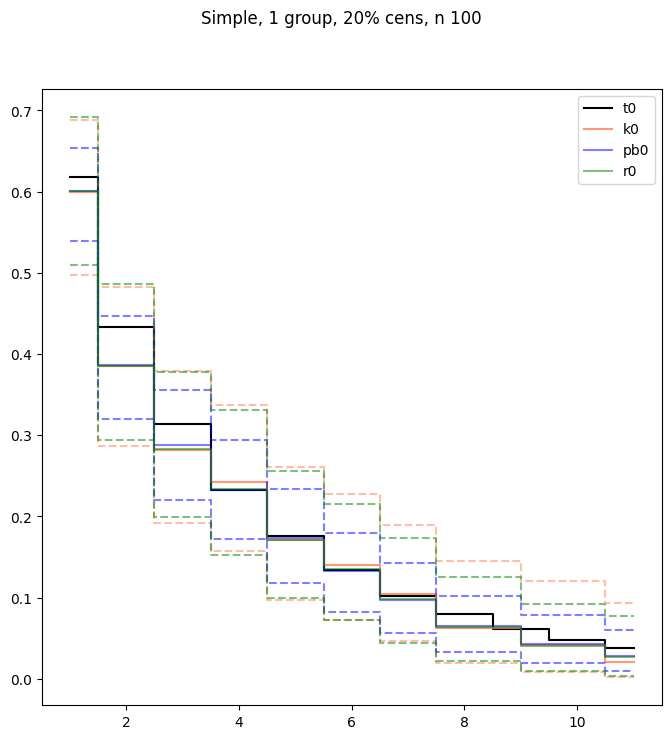

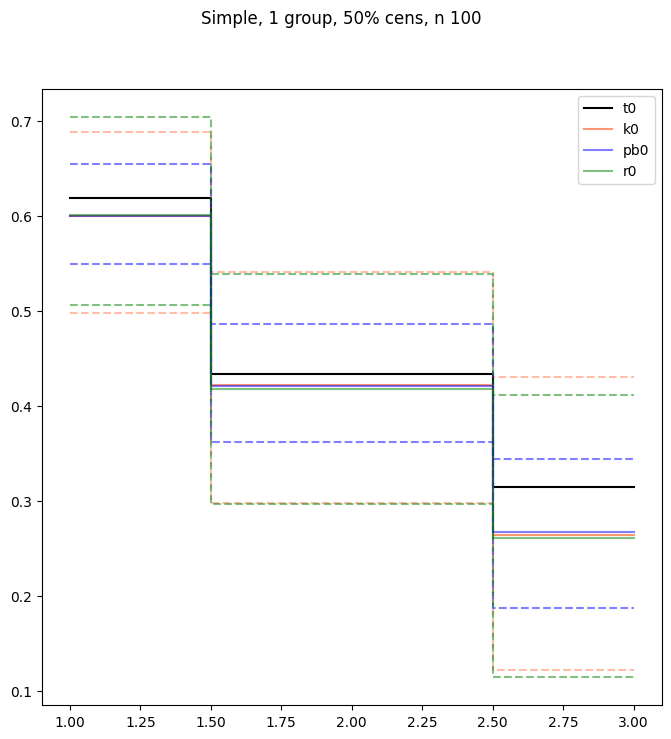

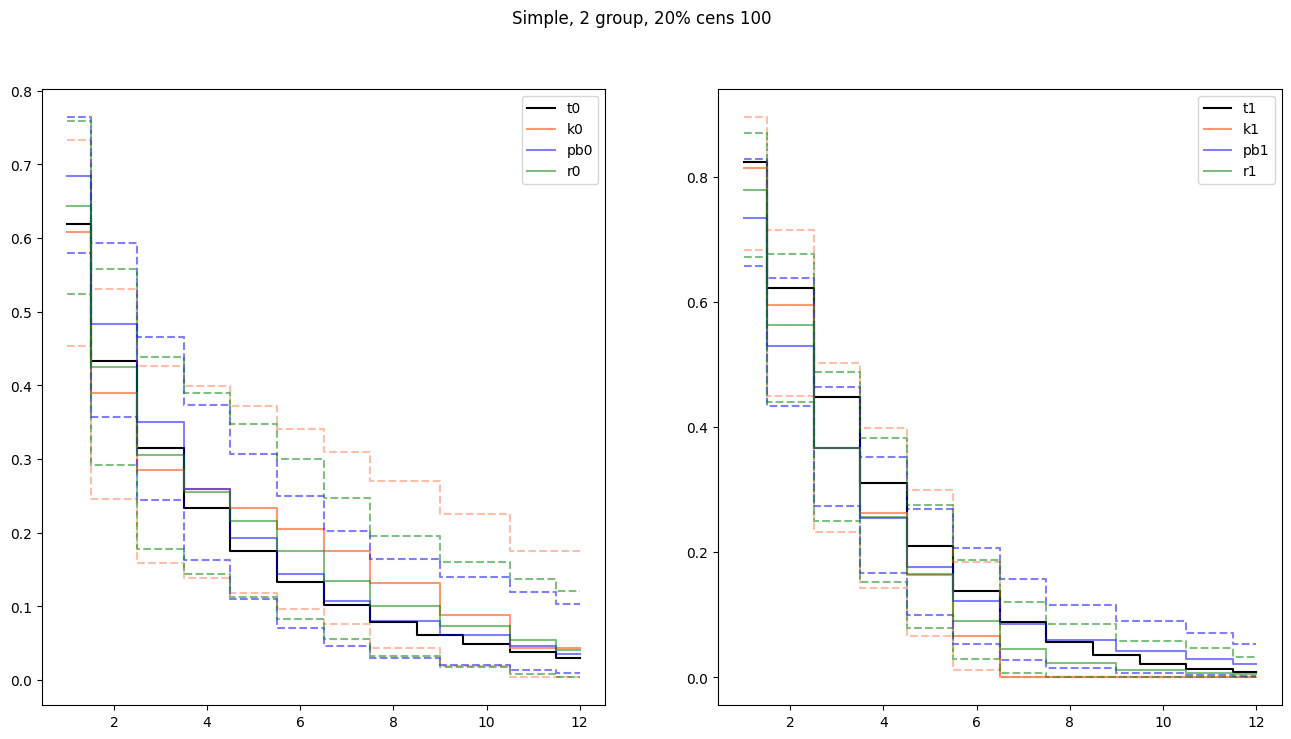

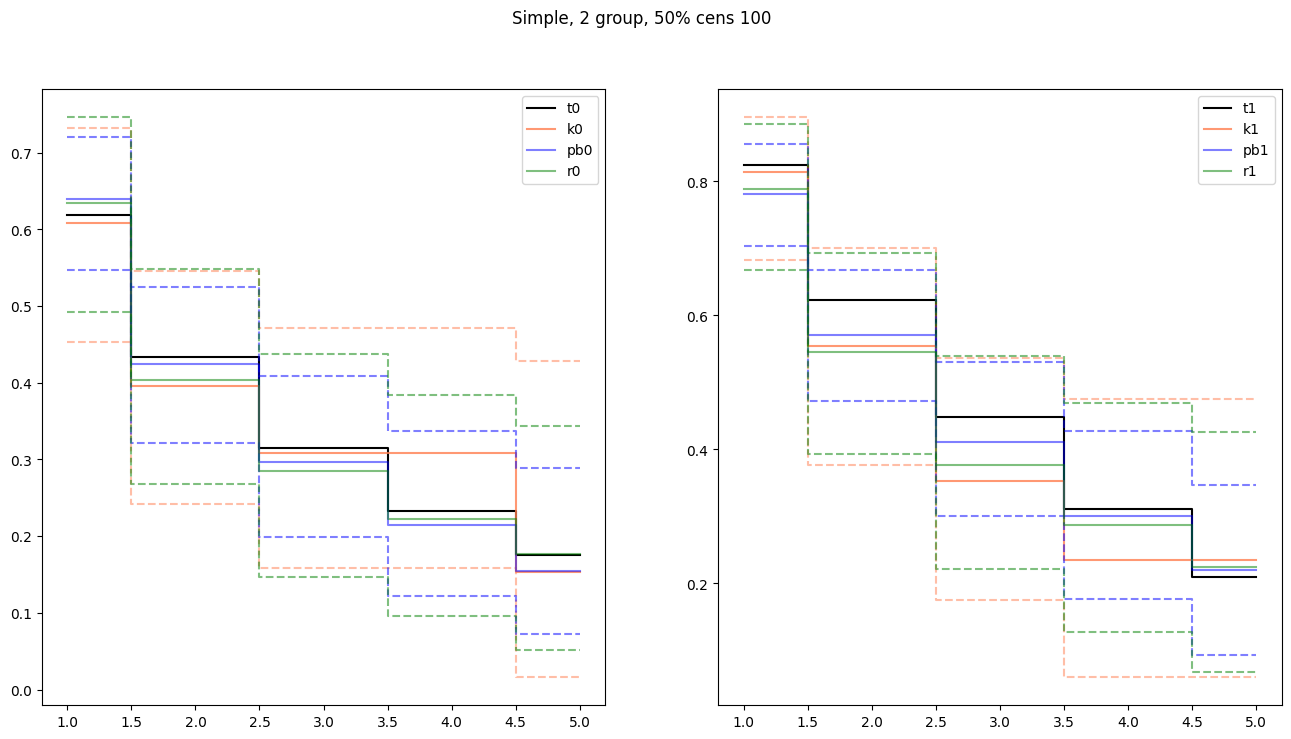

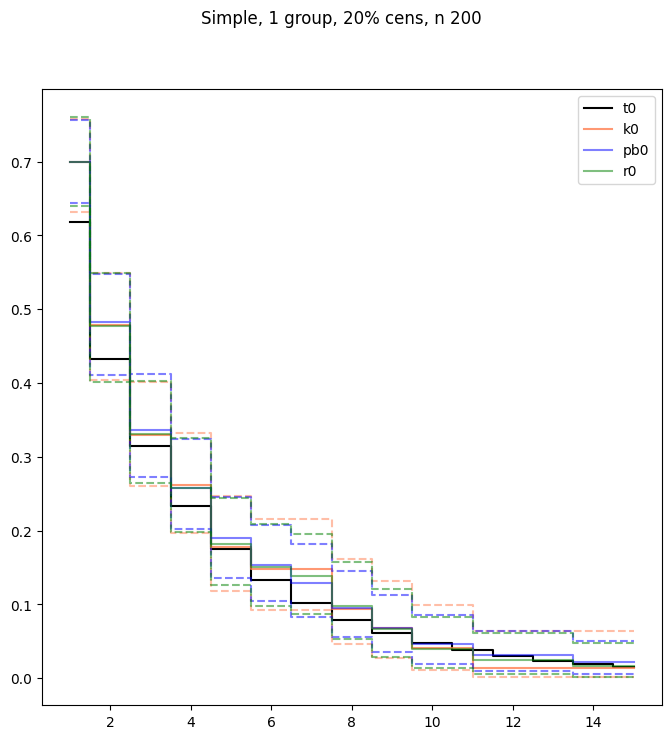

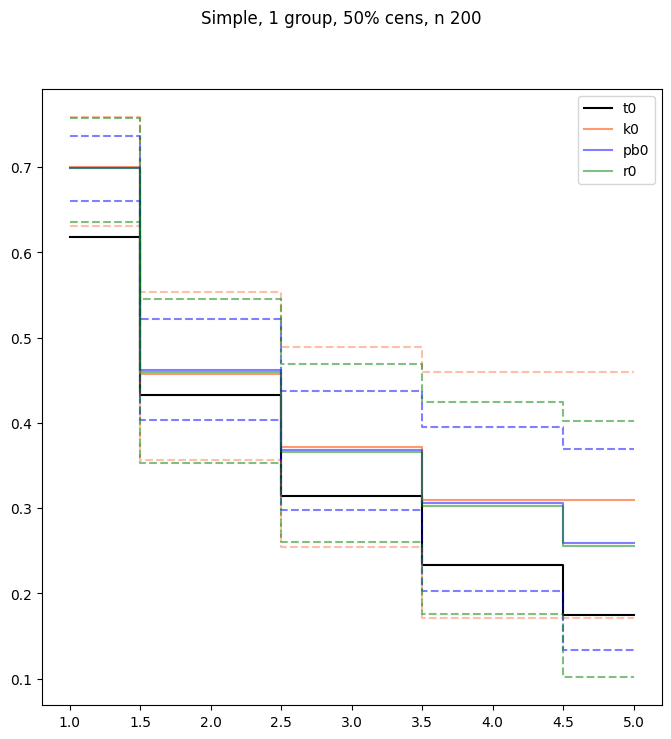

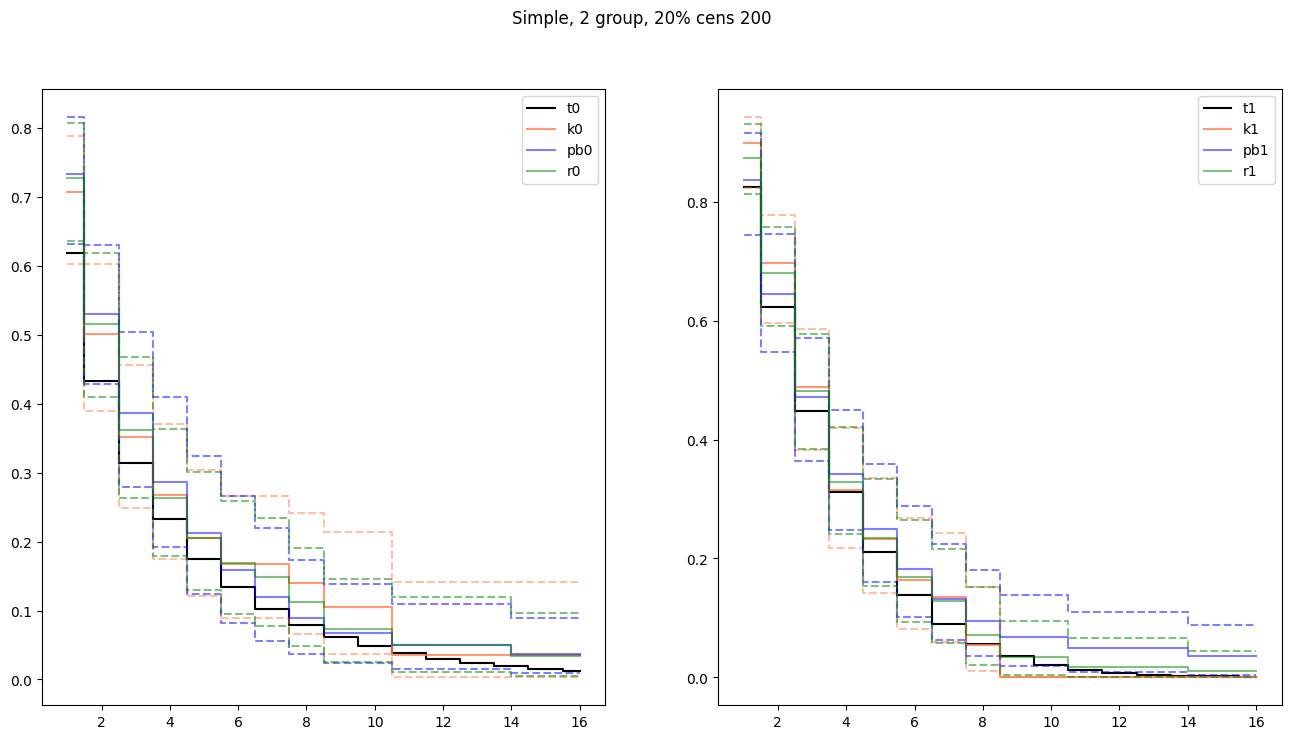

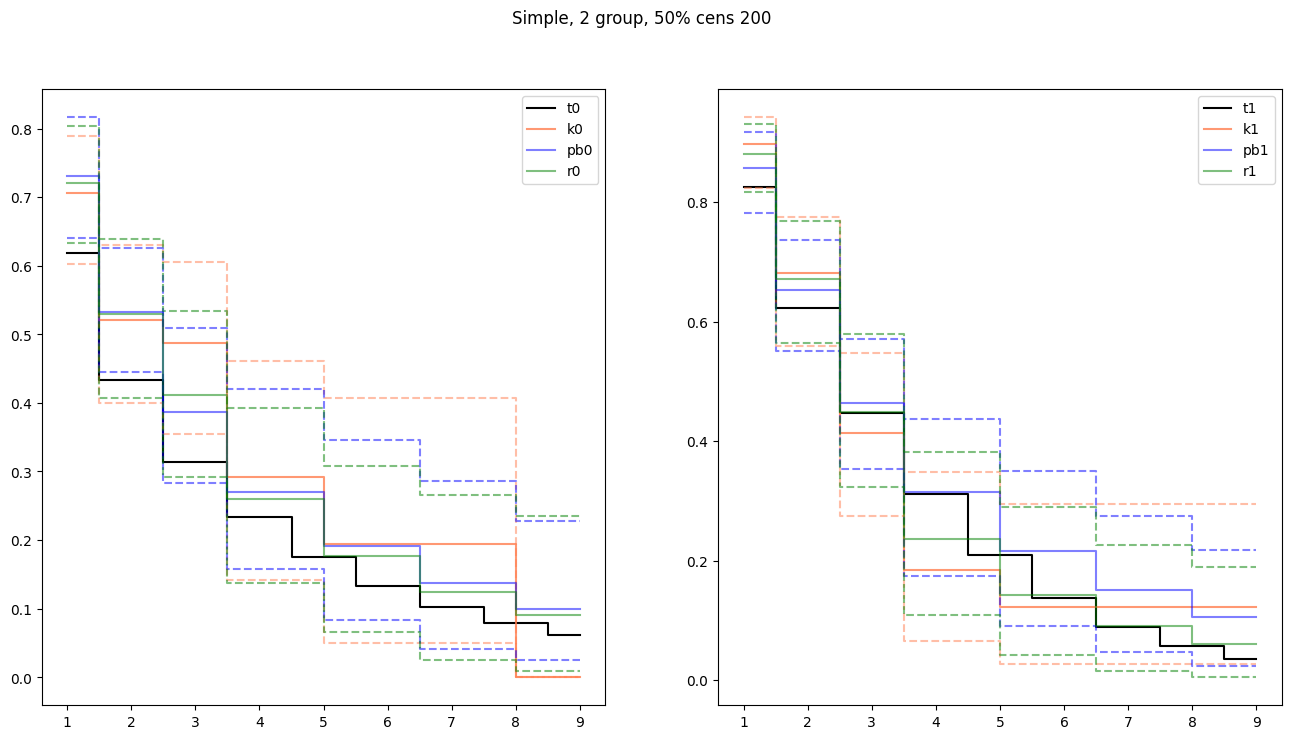

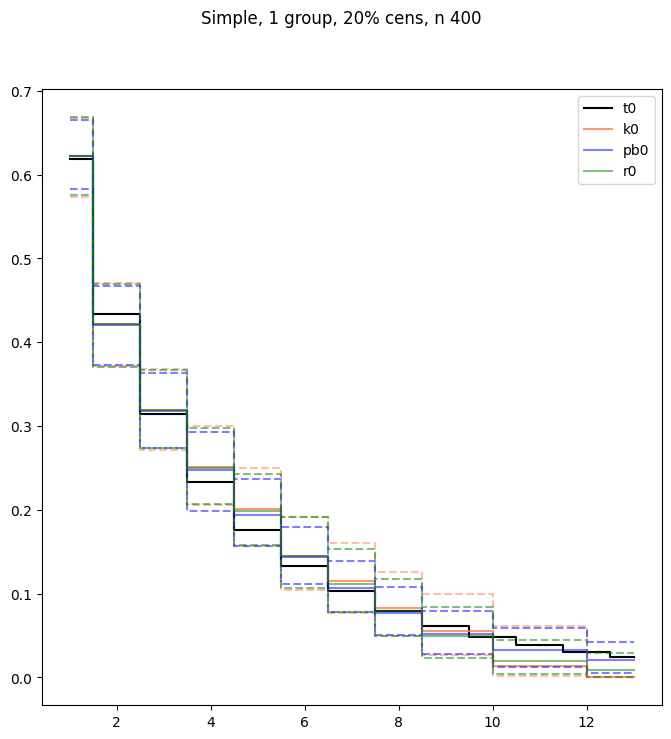

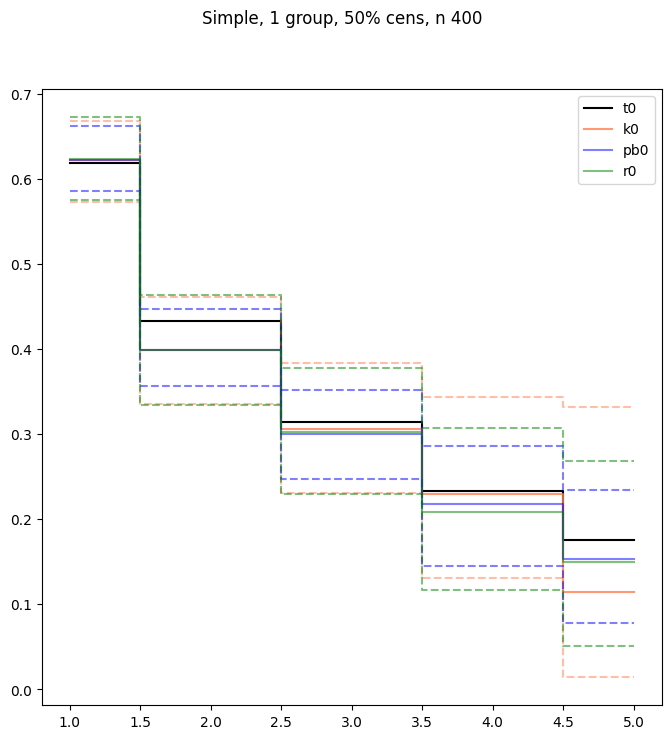

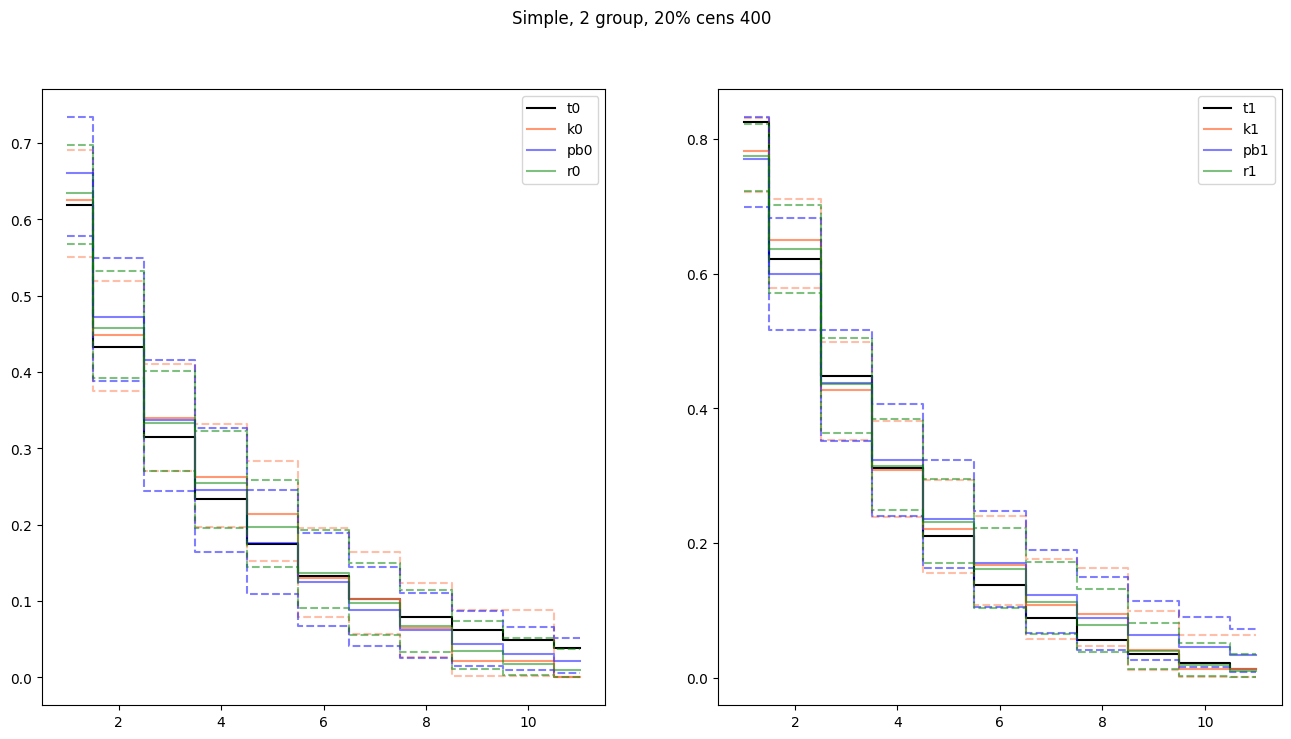

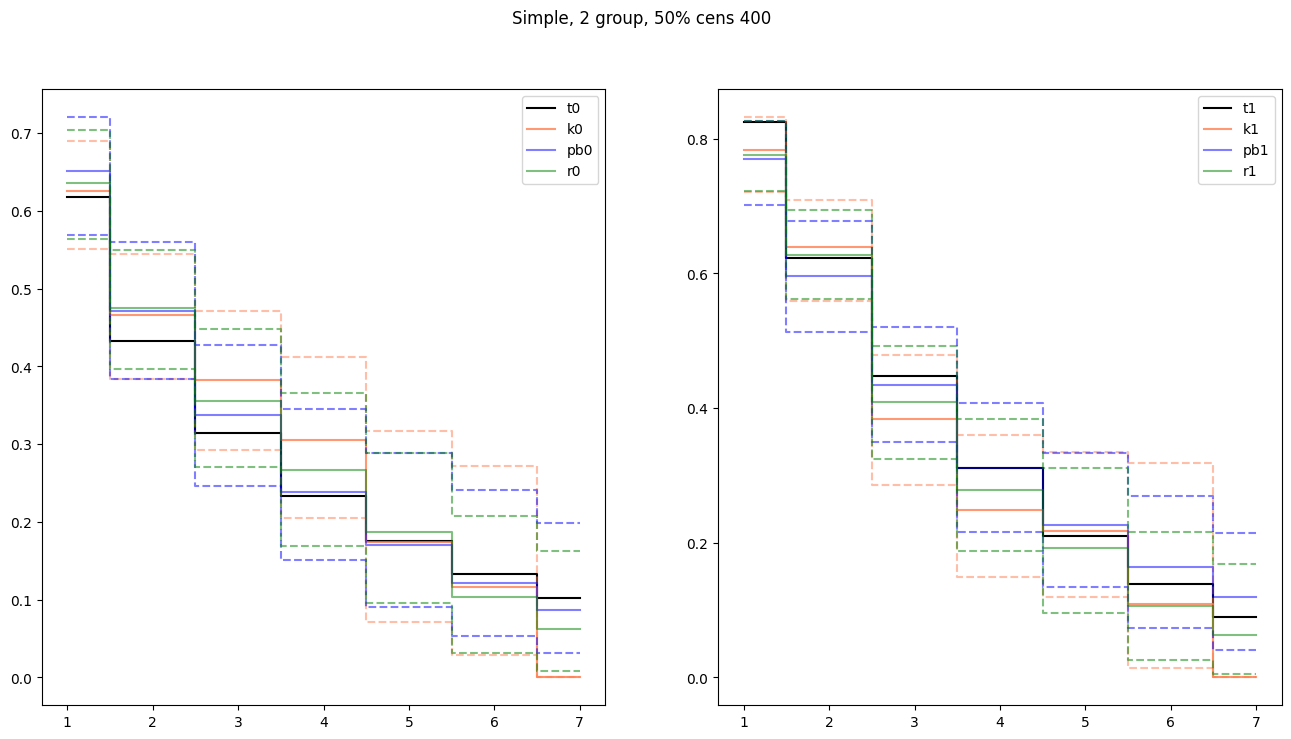

In [7]:
# for i in cn.N:
ml.start_run(run_name="run4")
ml.log_dict({"iters":iters}, "iters.json")

for N in cn.N:
    
    # cond 1_1
    meta,cens, k,p,r,fig = si.iter_simulation_1s(
        iters=iters, 
        n=N,
        scenario= cn.simple_1_1, 
        SPLIT_RULES=SPLIT_RULES1, 
        model_dict=model_dict1, 
        sampler_dict=sampler_dict1
    )
    log_params("1_1", N, cn.simple_1_1, model_dict1, sampler_dict1)
    log_mets("1_1", N, cens, k, p, r)
    log_figures("1_1",N,fig)

    # cond 1_2
    meta, cens,k,p,r, fig= si.iter_simulation_1s(
        iters=iters, 
        n=N,
        scenario= cn.simple_1_2, 
        SPLIT_RULES=SPLIT_RULES1, 
        model_dict=model_dict1, 
        sampler_dict=sampler_dict1
    )
    log_params("1_2", N, cn.simple_1_2, model_dict1, sampler_dict1)
    log_mets("1_2", N, cens, k, p, r)
    log_figures("1_2",N,fig)
    # cond 2_1
    meta, cens,k,p,r,fig = si.iter_simulation_2s(
        iters=iters, 
        n=N,
        scenario= cn.simple_2_1, 
        SPLIT_RULES=SPLIT_RULES2, 
        model_dict=model_dict2, 
        sampler_dict=sampler_dict2
    )
    log_params("2_1", N, cn.simple_2_1, model_dict2, sampler_dict2)
    log_mets("2_1", N, cens, k, p, r)
    log_figures("2_1",N,fig)

    #cond 2_2
    meta, cens,k,p,r,fig = si.iter_simulation_2s(
        iters=iters, 
        n=N,
        scenario= cn.simple_2_2, 
        SPLIT_RULES=SPLIT_RULES2, 
        model_dict=model_dict2, 
        sampler_dict=sampler_dict2
    )
    log_params("2_1", N, cn.simple_2_2, model_dict2, sampler_dict2)
    log_mets("2_2", N, cens, k, p, r)
    log_figures("2_2",N,fig)

ml.end_run()


In [13]:
ml.end_run()

In [7]:
import multiprocessing as mp

In [9]:
mp.parent_process()
